***
***
***

<br><h2>NHAT_PHAN_A1_Analysis</h2>
<h4>Machine Learning - DAT-5303 - FMSBA2</h4>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Exploratory Data Analysis</h3><br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import gender_guesser.detector as gender

import warnings
warnings.filterwarnings("ignore")
from time import process_time
time_start = process_time()  



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)
print(original_df.columns)
original_df.head(n = 5)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [2]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

In [3]:
print(original_df.isnull().sum())
original_df.describe().round(2)

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


<strong>SPOTTED: Missing Values</strong>

We could observe that there are missing values in "FAMILY_NAME".
In this situation we use loop to flag missing values then apply it to the whole dataset.

In [4]:
# In this situation we use loop to flag missing values then apply it to the whole dataset. 

for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)

original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0


***
***

<strong>Handling Missing Values</strong>

Because the missing values are all in variable: "family name".
In this analysis we will use first name as a tool for gender guessing, while "family name" is a predictor for customes' seriousness in registering / subscribing to Apprentice Chef App.

Therefore, the customers with family names will be recorded as <strong>"1"</strong>, while the ones without family names will be recorded as <strong>"0"</strong>.<br><br>


In [47]:
original_df['CLASS_FAMILY_NAME'] = original_df['FAMILY_NAME']
original_df['CLASS_FAMILY_NAME'] = pd.notnull(original_df['CLASS_FAMILY_NAME'])
original_df['CLASS_FAMILY_NAME'] = original_df['CLASS_FAMILY_NAME'].astype(int)
original_df['CLASS_FAMILY_NAME'].value_counts()

1    1899
0      47
Name: CLASS_FAMILY_NAME, dtype: int64

***
***

<strong>INTERACTION IN REGRESSION</strong>

In this complex study, the independent variables might interact with dependent variable. Although it makes the model more complex, but it is very practical in real-world business.

Due to the complexity and insight of the analysis, it is critical to incorporate it in my model.
As a result, variables will be generated which are <strong>EXP_PER_ORDER & LARGEST_EXP </strong> which refer to average expenditure the customer spend for each orders and their highest spending through our app.

Furthermore, according to knowledge from data management; we are recommended to interpret <strong>SPEND_ON_CATEGORIES</strong>.

The dataset also disclose our users' decision-making process; we could utilize PRODUCT_CATEGORIES_VIEWED and UNIQUE_MEALS_PURCH by <strong>ORDERS_OVER_VIEWS</strong>.

Last but not least, separate cancellation (before and after noon) could be ignored due to insignificant p-value, an appropriate approach is to interpret the cancellation's impact on revenue, it is <strong>REV_LOS_FOR_CANCEL</strong>
***
***


In [6]:
original_df['EXP_PER_ORDER'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

original_df['LARGEST_EXP'] = original_df['EXP_PER_ORDER'] * original_df['LARGEST_ORDER_SIZE']

original_df['SPEND_ON_CATEGORIES'] = original_df['REVENUE'] / original_df['UNIQUE_MEALS_PURCH']

original_df['ORDERS_OVER_VIEWS'] = original_df['UNIQUE_MEALS_PURCH'] / original_df['PRODUCT_CATEGORIES_VIEWED']

original_df['REV_LOS_FOR_CANCEL'] = original_df['EXP_PER_ORDER'] * (original_df['CANCELLATIONS_BEFORE_NOON'] + 0.5*original_df['CANCELLATIONS_AFTER_NOON'])


In [7]:
original_df.loc[:, :].quantile([0.20,
                         0.40,
                         0.60,
                         0.80,
                         1.00])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,CLASS_FAMILY_NAME,EXP_PER_ORDER,LARGEST_EXP,SPEND_ON_CATEGORIES,ORDERS_OVER_VIEWS,REV_LOS_FOR_CANCEL
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,108.6,3.0,0.0,2.0,12.0,0.0,0.0,1.0,19.827586,80.000000,218.750,0.428571,0.000000
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,1.0,5.0,1.0,5.0,0.0,2.0,0.0,0.0,20.0,134.4,4.0,0.0,3.0,13.0,0.0,0.0,1.0,29.523810,116.883117,326.250,0.750000,23.557692
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,1.0,6.0,2.0,10.0,1.0,3.0,0.0,0.0,40.0,156.7,5.0,1.0,3.0,14.0,28.0,0.0,1.0,38.181818,162.500000,507.500,1.142857,46.040123
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,1.0,6.0,2.0,16.0,3.0,5.0,1.0,0.0,70.0,183.8,6.0,1.0,3.0,16.0,210.0,0.0,1.0,47.916667,220.714286,841.875,2.250000,88.750000
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,1.0,7.0,3.0,52.0,9.0,19.0,1.0,1.0,90.0,564.2,11.0,3.0,5.0,19.0,1600.0,1.0,1.0,153.125000,862.500000,8793.750,12.000000,889.350000


<strong>DATA TYPES</strong>

Although the dictionary file "Apprentice_Chef_Data_Dictionary.xlsx" provides us a brief description about data type for each variables, the analysis demands more detailed approach whether or not the data type is  CONTINUOUS/INTERVAL, BINARY, especially CATEGORICAL,etc. 

Furthermore, we are able to make assumptions that <strong>FOLLOWED_RECOMMENDATIONS_PCT</strong> is a <strong>CATEGORICAL VARIABLE</strong>.

In [8]:
print(f'''
THE CATEGORICAL VARIABLE
FOLLOWED_RECOMMENDATIONS_PCT:
---------
{original_df['FOLLOWED_RECOMMENDATIONS_PCT'].value_counts().sort_index()}
''')


THE CATEGORICAL VARIABLE
FOLLOWED_RECOMMENDATIONS_PCT:
---------
0     155
10    404
20    361
30    242
40     97
50    140
60    150
70    190
80    142
90     65
Name: FOLLOWED_RECOMMENDATIONS_PCT, dtype: int64



<h3>Part II: Feature Treatment and Engineering</h3><br>

<strong>Let's work with Email Adresses</strong>

The marketing team of Apprentice Chef want to classify email domains, whether it is professional, personal and junk. As a result, we will analyse the outcomes as Categorical data of 3 categories.
 

In [9]:
original_df.EMAIL.head(5)

0                   addam.osgrey@passport.com
1                     aegon.blackfyre@jnj.com
2         aegon.frey.(son.of.aenys)@gmail.com
3    aegon.targaryen.(son.of.rhaegar)@ibm.com
4           aegon.v.targaryen@goldmansacs.com
Name: EMAIL, dtype: object

In [10]:
placeholder_lst = []

for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

email_df = pd.DataFrame(placeholder_lst, columns = ['Name','Domain'])


In [11]:
original_df_concat = pd.concat([original_df, email_df.loc[:,'Domain']],
                   axis = 1)

original_df_concat.loc[:,'Domain'].value_counts().head(9)


gmail.com         303
protonmail.com    284
yahoo.com         274
msn.com            72
aol.com            69
passport.com       64
hotmail.com        63
live.com           62
me.com             59
Name: Domain, dtype: int64

In [12]:
unique_email = pd.unique(original_df_concat.loc[:,'Domain'])
unique_email = list(unique_email)

In [13]:
# we now create lists of categories.
personal_email_domains = ['gmail.com','yahoo.com','protonmail.com']
junk_email_domains = ['me.com','aol.com','hotmail.com', 'live.com', 'msn.com', 'passport.com']
professional_email_domains = ['mmm.com', 'amex.com', 'apple.com',
'boeing.com', 'caterpillar.com', 'chevron.com', 
'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 
'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 
'ibm.com', 'intel.com ','jnj.com', 'jpmorgan.com', 'mcdonalds.com', 
'merck.com', 'microsoft.com', 'nike.com','pfizer.com', 'pg.com', 
'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com',
'visa.com', 'walmart.com']


In [14]:
# placeholder list
placeholder_lst = []


# looping is applying to group observations
for domain in original_df_concat['Domain']:
        if domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif domain in junk_email_domains :
            placeholder_lst.append('junk')
        
        elif domain in professional_email_domains:
            placeholder_lst.append('professional')
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df_concat['domain_group'] = pd.Series(placeholder_lst)


# results
original_df_concat['domain_group'].value_counts()

print(original_df_concat['domain_group'].isnull().any())
print(original_df_concat['domain_group'].tail(n = 18))

Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
True
1928    junk
1929     NaN
1930     NaN
1931     NaN
1932     NaN
1933     NaN
1934     NaN
1935     NaN
1936     NaN
1937     NaN
1938     NaN
1939     NaN
1940     NaN
1941     NaN
1942     NaN
1943     NaN
1944     NaN
1945     NaN
Name: domain_group, dtype: object


<strong>Unexpectedly</strong>, it turns out there is a bug in python Jupiter Notebook, which makes the function not filling in the values of last 17 rows.

<strong>However</strong> as a Data Scientist/ Business Analyst from HULT and Prof. Chase, We could confidently solve the problem.


In [15]:
for domain in original_df_concat['Domain'].tail(n = 17):
        if domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif domain in junk_email_domains :
            placeholder_lst.append('junk')
        
        elif domain in professional_email_domains:
            placeholder_lst.append('professional')
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df_concat['domain_group']= pd.Series(placeholder_lst)


# checking results
print("Is there any null value ?:",
      original_df_concat['domain_group'].isnull().any())

original_df_concat['domain_group'].value_counts()



Is there any null value ?: False


personal        866
professional    679
junk            401
Name: domain_group, dtype: int64


<br>
<strong>Dealing With Categorical Data</strong>

In this situation the optimal tool is one hot encode each categorical variable using <strong>pd.get_dummies</strong>.\
The categorical variables for get_dummies are:

original_df_concat['domain_group']
original_df_concat['FOLLOWED_RECOMMENDATIONS_PCT']

Afterwards, we could possibly remove the original categorical columns using <strong>drop</strong>. Finally, merging the one hot encoded\
data with the original_df_concat is compulsory <strong>drop</strong>.

In [16]:
one_hot_email = pd.get_dummies(original_df_concat['domain_group'])
one_hot_follow = pd.get_dummies(original_df_concat['FOLLOWED_RECOMMENDATIONS_PCT'])

#dropping
original_df_concat = original_df_concat.drop('domain_group', axis = 1)
original_df_concat = original_df_concat.drop('FOLLOWED_RECOMMENDATIONS_PCT', axis = 1)

#joining
original_df_concat = original_df_concat.join([one_hot_email,one_hot_follow])




<br>
<strong>CUSTOMER GENDER</strong>

A recent study <em>“Mind the Gap: The Gender Effect on Shopping Habits and Technology Disruptors" by First Insight, Inc. </em> have proved that genders play a stellar role in consumer behaviours and shopping preferences.

we could possibly scientificly detect genders of our customers by using <strong>gender.Detector().get_gender</strong> on consumer's first name. Further, analyze it as a binary variable <strong> "1" for Male and "0" for Female </strong>.

However, due to the processing time of gender guesser, it has to loop over each object of 1946 values. Moreover, the country of our consumers are not available. Therefore, the best approach would carry out research of each consumers to correctly dectect each user's gender.


In [17]:
Character_Gender = [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]

In [18]:
# guessing gender based on (given) name

# placeholder list
# placeholder_lst=[]


# looping to guess gender
# for name in original_df_concat.loc[:,'FIRST_NAME']:
#    guess = gender.Detector().get_gender(name)
#    print(guess)
#    placeholder_lst.append(guess)


# converting list into a series
#original_df_concat['gender_guess'] = pd.Series(placeholder_lst)
original_df_concat['Gender'] = Character_Gender
original_df_concat['Gender'].head(5)



0    1
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64


<br>
<strong>FILTERING VARIABLES</strong>

It leads us to the Pearson correlation coefficient, at this stage we now measure how relevant our explanatory are; furthermore, we wil select the variables with has signicant p-value less than 0.05.

As a result, we will generate two regression analysises.


In [19]:
original_df_explanatory = original_df_concat.copy()


# dropping SalePrice and Order from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(columns = ['REVENUE','EMAIL','FIRST_NAME','FAMILY_NAME','Domain','NAME'], axis = 1)


# The comment-out steps will only use for code editing.
# formatting each explanatory variable for statsmodels
# for val in original_df_explanatory:
#   print(f"original_df_concat['{val}']+")

In [20]:
# this is the first run for all variables
lm_full = smf.ols(formula = ''' original_df_concat['REVENUE'] ~ original_df_concat['CROSS_SELL_SUCCESS']+
                                original_df_concat['TOTAL_MEALS_ORDERED']+
                                original_df_concat['UNIQUE_MEALS_PURCH']+
                                original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']+
                                original_df_concat['PRODUCT_CATEGORIES_VIEWED']+
                                original_df_concat['AVG_TIME_PER_SITE_VISIT']+
                                original_df_concat['MOBILE_NUMBER']+
                                original_df_concat['CANCELLATIONS_BEFORE_NOON']+
                                original_df_concat['CANCELLATIONS_AFTER_NOON']+
                                original_df_concat['TASTES_AND_PREFERENCES']+
                                original_df_concat['MOBILE_LOGINS']+
                                original_df_concat['PC_LOGINS']+
                                original_df_concat['WEEKLY_PLAN']+
                                original_df_concat['EARLY_DELIVERIES']+
                                original_df_concat['LATE_DELIVERIES']+
                                original_df_concat['PACKAGE_LOCKER']+
                                original_df_concat['REFRIGERATED_LOCKER']+
                                original_df_concat['AVG_PREP_VID_TIME']+
                                original_df_concat['LARGEST_ORDER_SIZE']+
                                original_df_concat['MASTER_CLASSES_ATTENDED']+
                                original_df_concat['MEDIAN_MEAL_RATING']+
                                original_df_concat['AVG_CLICKS_PER_VISIT']+
                                original_df_concat['TOTAL_PHOTOS_VIEWED']+
                                original_df_concat['m_FAMILY_NAME']+
                                original_df_concat['CLASS_FAMILY_NAME']+
                                original_df_concat['EXP_PER_ORDER']+
                                original_df_concat['LARGEST_EXP']+
                                original_df_concat['SPEND_ON_CATEGORIES']+
                                original_df_concat['ORDERS_OVER_VIEWS']+
                                original_df_concat['REV_LOS_FOR_CANCEL']+
                                original_df_concat['Gender']+
                                original_df_concat['junk']+
                                original_df_concat['personal']+
                                original_df_concat['professional']+
                                original_df_concat[0]+
                                original_df_concat[10]+
                                original_df_concat[20]+
                                original_df_concat[30]+
                                original_df_concat[40]+
                                original_df_concat[50]+
                                original_df_concat[60]+
                                original_df_concat[70]+
                                original_df_concat[80]+
                                original_df_concat[90]''',
                                data = original_df_concat)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
print(results_full.rsquared.round(3))
results_full.summary()
                  

0.853


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     original_df_concat['REVENUE']   R-squared:                       0.853
Model:                                       OLS   Adj. R-squared:                  0.850
Method:                            Least Squares   F-statistic:                     269.9
Date:                           Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                                   16:34:48   Log-Likelihood:                -14588.
No. Observations:                           1946   AIC:                         2.926e+04
Df Residuals:                               1904   BIC:                         2.949e+04
Df Model:                                     41                                         
Covariance Type:                       nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -472.6659    119.349     -3.960      0.000    -706.734    -238.598
original_df_concat['CROSS_SELL_SUCCESS']            -21.4907     27.867     -0.771      0.441     -76.143      33.162
original_df_concat['TOTAL_MEALS_ORDERED']             8.6413      0.330     26.165      0.000       7.994       9.289
original_df_concat['UNIQUE_MEALS_PURCH']             56.8279      6.069      9.363      0.000      44.925      68.731
original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']     4.5305      5.545      0.817      0.414      -6.344      15.405
original_df_concat['PRODUCT_CATEGORIES_VIEWED']      20.5737      4.881      4.215      0.000      11.001      30.146
original_df_concat['AVG_TIME_PER_SITE_VISIT']         0.7587      0.174      4.355      0.000       0.417       1.100
original_df_concat['MOBILE_NUMBER']                  -1.0590     30.987     -0.034      0.973     -61.832      59.714
original_df_concat['CANCELLATIONS_BEFORE_NOON']      10.3383     13.510      0.765      0.444     -16.157      36.833
original_df_concat['CANCELLATIONS_AFTER_NOON']       16.7845     24.097      0.697      0.486     -30.476      64.045
original_df_concat['TASTES_AND_PREFERENCES']         24.6286     22.435      1.098      0.272     -19.371      68.629
original_df_concat['MOBILE_LOGINS']                   2.4856     17.402      0.143      0.886     -31.644      36.615
original_df_concat['PC_LOGINS']                     -24.2474     19.225     -1.261      0.207     -61.952      13.457
original_df_concat['WEEKLY_PLAN']                    -0.5997      0.744     -0.806      0.420      -2.059       0.860
original_df_concat['EARLY_DELIVERIES']                3.1892      4.346      0.734      0.463      -5.335      11.713
original_df_concat['LATE_DELIVERIES']                 6.0408      3.676      1.644      0.100      -1.168      13.249
original_df_concat['PACKAGE_LOCKER']                  1.6854     24.070      0.070      0.944     -45.520      48.891
original_df_concat['REFRIGERATED_LOCKER']           -37.5063     36.420     -1.030      0.303    -108.933      33.920
original_df_concat['AVG_PREP_VID_TIME']               6.3376      0.411     15.405      0.000       5.531       7.144
original_df_concat['LARGEST_ORDER_SIZE']           -181.0675     17.201    -10.527      0.000    -214.802    -147.333
original_df_concat['MASTER_CLASSES_ATTENDED']       102.8668     18.458      5.573      0.000      66.666     139.067
original_df_concat['MEDIAN_MEAL_RATING']            264.4660     27.157      9.738      0.000     211.206     317.726
original_df_

In [21]:
# we take out high p-value variables and run again

lm_full = smf.ols(formula = ''' original_df_concat['REVENUE'] ~ original_df_concat['TOTAL_MEALS_ORDERED']+
                                original_df_concat['EXP_PER_ORDER']+
                                original_df_concat['AVG_PREP_VID_TIME']+
                                original_df_concat['MEDIAN_MEAL_RATING']+
                                original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']+
                                original_df_concat['TOTAL_PHOTOS_VIEWED']+
                                original_df_concat['MASTER_CLASSES_ATTENDED']+
                                original_df_concat['UNIQUE_MEALS_PURCH']+
                                original_df_concat['LARGEST_ORDER_SIZE']+
                                original_df_concat['EXP_PER_ORDER']+
                                original_df_concat['LARGEST_EXP']+
                                original_df_concat['SPEND_ON_CATEGORIES']+
                                original_df_concat['ORDERS_OVER_VIEWS']+
                                original_df_concat['EARLY_DELIVERIES']+
                                original_df_concat['LATE_DELIVERIES']+
                                original_df_concat['PACKAGE_LOCKER']+
                                original_df_concat['REFRIGERATED_LOCKER']+
                                original_df_concat['junk']+
                                original_df_concat['personal']+
                                original_df_concat['professional']+
                                original_df_concat[0]+
                                original_df_concat[10]+
                                original_df_concat[20]+
                                original_df_concat[30]+
                                original_df_concat[40]+
                                original_df_concat[50]+
                                original_df_concat[60]+
                                original_df_concat[70]+
                                original_df_concat[80]+
                                original_df_concat[90]''',
                                data = original_df_concat)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     original_df_concat['REVENUE']   R-squared:                       0.850
Model:                                       OLS   Adj. R-squared:                  0.847
Method:                            Least Squares   F-statistic:                     401.2
Date:                           Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                                   16:34:48   Log-Likelihood:                -14612.
No. Observations:                           1946   AIC:                         2.928e+04
Df Residuals:                               1918   BIC:                         2.944e+04
Df Model:                                     27                                         
Covariance Type:                       nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -699.8352     58.038    -12.058      0.000    -813.659    -586.011
original_df_concat['TOTAL_MEALS_ORDERED']             8.7026      0.333     26.168      0.000       8.050       9.355
original_df_concat['EXP_PER_ORDER']                  -0.0449      1.601     -0.028      0.978      -3.185       3.095
original_df_concat['AVG_PREP_VID_TIME']               6.5955      0.409     16.119      0.000       5.793       7.398
original_df_concat['MEDIAN_MEAL_RATING']            301.4188     16.601     18.157      0.000     268.862     333.976
original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']     2.9133      5.568      0.523      0.601      -8.006      13.832
original_df_concat['TOTAL_PHOTOS_VIEWED']             0.5392      0.064      8.376      0.000       0.413       0.666
original_df_concat['MASTER_CLASSES_ATTENDED']       113.2542     18.449      6.139      0.000      77.072     149.436
original_df_concat['UNIQUE_MEALS_PURCH']             66.1670      5.614     11.786      0.000      55.156      77.178
original_df_concat['LARGEST_ORDER_SIZE']           -179.2765     17.300    -10.363      0.000    -213.205    -145.348
original_df_concat['LARGEST_EXP']                     3.2444      0.365      8.894      0.000       2.529       3.960
original_df_concat['SPEND_ON_CATEGORIES']             0.5951      0.018     32.938      0.000       0.560       0.631
original_df_concat['ORDERS_OVER_VIEWS']               9.8644      7.649      1.290      0.197      -5.137      24.865
original_df_concat['EARLY_DELIVERIES']                3.2506      4.366      0.745      0.457      -5.312      11.813
original_df_concat['LATE_DELIVERIES']                 6.3991      3.697      1.731      0.084      -0.851      13.649
original_df_concat['PACKAGE_LOCKER']                  8.0317     24.129      0.333      0.739     -39.290      55.354
original_df_concat['REFRIGERATED_LOCKER']           -48.9845     36.629     -1.337      0.181    -120.821      22.852
original_df_concat['junk']                         -222.8873     26.222     -8.500      0.000    -274.314    -171.461
original_df_concat['personal']                     -239.4294     24.013     -9.971      0.000    -286.523    -192.336
original_df_concat['professional']                 -237.5185     23.667    -10.036      0.000    -283.933    -191.104
original_df_concat[0]                               -41.5333     34.777     -1.194      0.233    -109.738      26.671
original_df_concat[10]                              -78.5108     23.749     -3.306      0.001    -125.088     -31.933
original_df_

In [22]:
# Selecting the relevant variables
results_table = results_full.summary()
summary_tables = results_full.pvalues.sort_values(ascending = True)
Selected_variables = summary_tables[summary_tables <=0.05].index
for val in Selected_variables:
    print(f"{val}+")

print("""

The list above is relevant variables, 
filtered by using significant p value after first brief Regression analysis""")


original_df_concat['SPEND_ON_CATEGORIES']+
original_df_concat['TOTAL_MEALS_ORDERED']+
original_df_concat['MEDIAN_MEAL_RATING']+
original_df_concat['AVG_PREP_VID_TIME']+
Intercept+
original_df_concat['UNIQUE_MEALS_PURCH']+
original_df_concat['LARGEST_ORDER_SIZE']+
original_df_concat['professional']+
original_df_concat['personal']+
original_df_concat['LARGEST_EXP']+
original_df_concat['junk']+
original_df_concat['TOTAL_PHOTOS_VIEWED']+
original_df_concat['MASTER_CLASSES_ATTENDED']+
original_df_concat[10]+
original_df_concat[20]+
original_df_concat[30]+
original_df_concat[80]+


The list above is relevant variables, 
filtered by using significant p value after first brief Regression analysis


<strong>Develop thresholds</strong> at points where the trend changes.<br><br>
After filtering relevant variables we will identify where a variable's trend changes. The optimal tools are <em>SCATTERPLOTS</em>

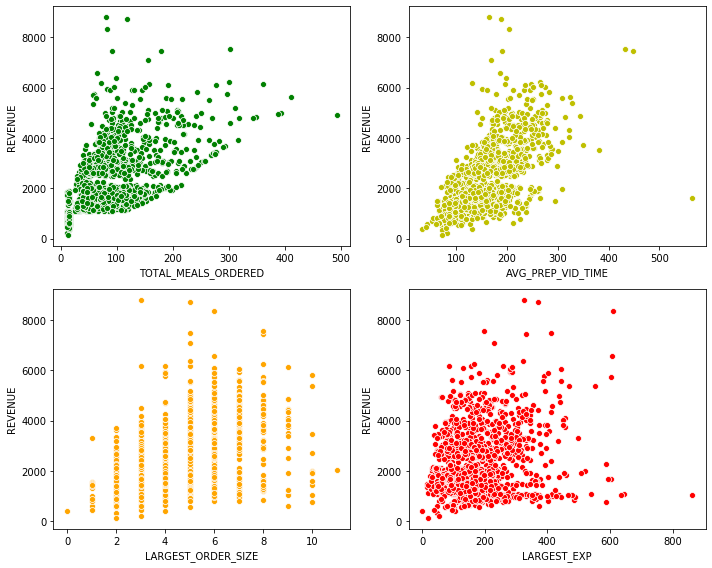

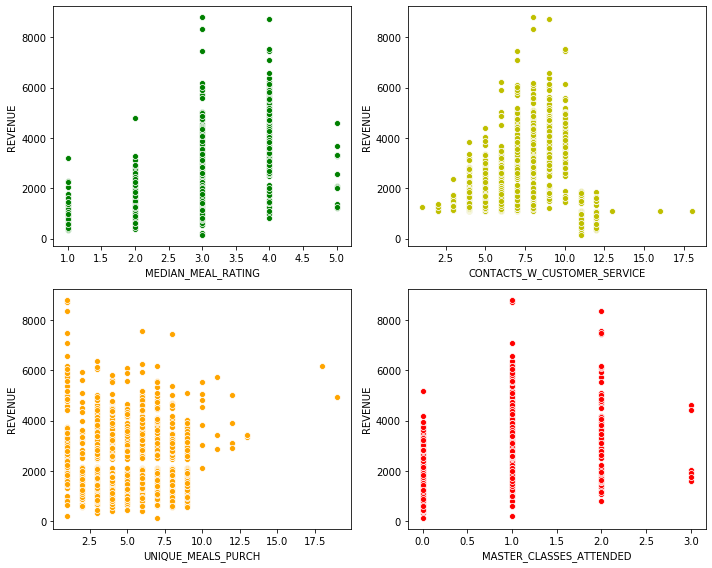

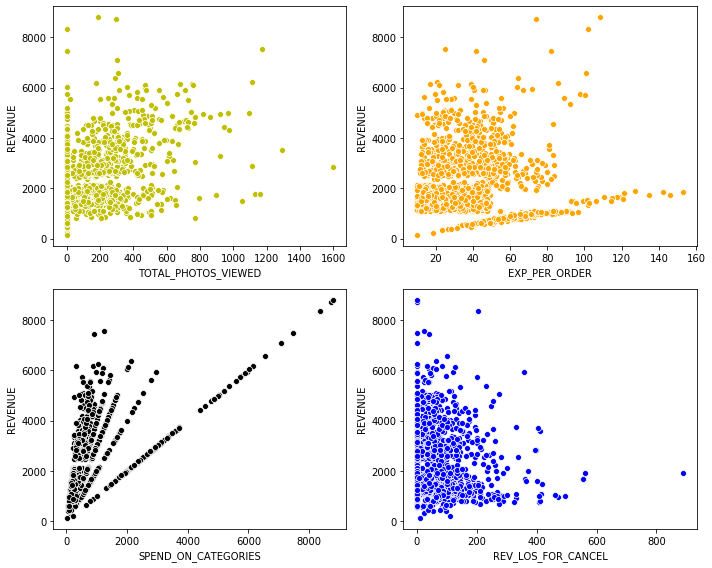

In [23]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df_concat['TOTAL_MEALS_ORDERED'],
                y = original_df_concat['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df_concat['AVG_PREP_VID_TIME'],
                y = original_df_concat['REVENUE'],
                color = 'y')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df_concat['LARGEST_ORDER_SIZE'],
                y = original_df_concat['REVENUE'],
                color = 'orange')
plt.xlabel('LARGEST_ORDER_SIZE')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df_concat['LARGEST_EXP'],
                y = original_df_concat['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_EXP')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df_concat['MEDIAN_MEAL_RATING'],
                y = original_df_concat['REVENUE'],
                color = 'g')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df_concat['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df_concat['REVENUE'],
                color = 'y')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df_concat['UNIQUE_MEALS_PURCH'],
                y = original_df_concat['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df_concat['MASTER_CLASSES_ATTENDED'],
                y = original_df_concat['REVENUE'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df_concat['TOTAL_PHOTOS_VIEWED'],
                y = original_df_concat['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df_concat['EXP_PER_ORDER'],
                y = original_df_concat['REVENUE'],
                color = 'orange')
plt.xlabel('EXP_PER_ORDER')

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df_concat['SPEND_ON_CATEGORIES'],
                y = original_df_concat['REVENUE'],
                color = 'black')
plt.xlabel('SPEND_ON_CATEGORIES')

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df_concat['REV_LOS_FOR_CANCEL'],
                y = original_df_concat['REVENUE'],
                color = 'blue')
plt.xlabel('REV_LOS_FOR_CANCEL')

########################
plt.tight_layout()
plt.show()

<strong> Trend-Based Thresholds </strong>
By observing graphs above, thresholds are created.

In [24]:
TOTAL_MEALS_ORDERED_change = 250
AVG_PREP_VID_TIME_change   = 270
LARGEST_ORDER_SIZE_change  = 7
LARGEST_EXP_change         = 400
MEDIAN_MEAL_RATING_change  = 4
CONTACTS_W_CUSTOMER_SERVICE_change = 10
UNIQUE_MEALS_PURCH_change          = 7
MASTER_CLASSES_ATTENDED_change     = 2
EXP_PER_ORDER_change               = 55
REV_LOS_FOR_CANCEL_change          = 200
SPEND_ON_CATEGORIES_change         = 4000

In [25]:
# greater than sign

original_df_concat['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df_concat.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df_concat['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change]

original_df_concat['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# REV_LOS_FOR_CANCEL
original_df_concat['change_REV_LOS_FOR_CANCEL'] = 0
condition = original_df_concat.loc[0:,'change_REV_LOS_FOR_CANCEL'][original_df_concat['REV_LOS_FOR_CANCEL'] > REV_LOS_FOR_CANCEL_change]

original_df_concat['change_REV_LOS_FOR_CANCEL'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

# SPEND_ON_CATEGORIES
original_df_concat['change_SPEND_ON_CATEGORIES'] = 0
condition = original_df_concat.loc[0:,'change_SPEND_ON_CATEGORIES'][original_df_concat['SPEND_ON_CATEGORIES'] > SPEND_ON_CATEGORIES_change]

original_df_concat['change_SPEND_ON_CATEGORIES'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# AVG_PREP_VID_TIME
original_df_concat['change_AVG_PREP_VID_TIME'] = 0
condition = original_df_concat.loc[0:,'change_AVG_PREP_VID_TIME'][original_df_concat['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change]

original_df_concat['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# LARGEST_ORDER_SIZE
original_df_concat['change_LARGEST_ORDER_SIZE'] = 0

condition = original_df_concat.loc[0:,'change_LARGEST_ORDER_SIZE'][original_df_concat['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change]

original_df_concat['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# LARGEST_EXP
original_df_concat['change_LARGEST_EXP'] = 0

condition = original_df_concat.loc[0:,'change_LARGEST_EXP'][original_df_concat['LARGEST_EXP'] > LARGEST_EXP_change]

original_df_concat['change_LARGEST_EXP'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
original_df_concat['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0

condition = original_df_concat.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df_concat['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change]

original_df_concat['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# EXP_PER_ORDER
original_df_concat['change_EXP_PER_ORDER'] = 0

condition = original_df_concat.loc[0:,'change_EXP_PER_ORDER'][original_df_concat['EXP_PER_ORDER'] > EXP_PER_ORDER_change]

original_df_concat['change_EXP_PER_ORDER'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# double-equals sign

# MEDIAN_MEAL_RATING
original_df_concat['change_MEDIAN_MEAL_RATING'] = 0
condition = original_df_concat.loc[0:,'change_MEDIAN_MEAL_RATING'][original_df_concat['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change]

original_df_concat['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# UNIQUE_MEALS_PURCH
original_df_concat['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df_concat.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df_concat['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_change]

original_df_concat['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
                   
                   
# MASTER_CLASSES_ATTENDED
original_df_concat['change_MASTER_CLASSES_ATTENDED'] = 0
condition = original_df_concat.loc[0:,'change_MASTER_CLASSES_ATTENDED'][original_df_concat['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_change]

original_df_concat['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


In [26]:
original_df_explanatory = original_df_concat.copy()


# dropping SalePrice and Order from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(columns = ['REVENUE','EMAIL','FIRST_NAME','FAMILY_NAME','Domain','NAME'], axis = 1)

# The comment out steps will only use for code editing.
# formatting each explanatory variable for statsmodels
# for val in original_df_explanatory:
#   print(f"original_df_concat['{val}']+")

<strong>Ordinary least squares [OLS]</strong>
At this stage of the analysis, we have done filtering variables.
stat model OLS is applied to double check.


In [27]:
# This is the finall OLS run
lm_full = smf.ols(formula = ''' original_df_concat['REVENUE'] ~ original_df_concat['TOTAL_MEALS_ORDERED']+
                                original_df_concat['EXP_PER_ORDER']+
                                original_df_concat['AVG_PREP_VID_TIME']+
                                original_df_concat['MEDIAN_MEAL_RATING']+
                                original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']+
                                original_df_concat['TOTAL_PHOTOS_VIEWED']+
                                original_df_concat['MASTER_CLASSES_ATTENDED']+
                                original_df_concat['UNIQUE_MEALS_PURCH']+
                                original_df_concat['LARGEST_ORDER_SIZE']+
                                original_df_concat['EXP_PER_ORDER']+
                                original_df_concat['LARGEST_EXP']+
                                original_df_concat['SPEND_ON_CATEGORIES']+
                                original_df_concat['ORDERS_OVER_VIEWS']+
                                original_df_concat['change_TOTAL_MEALS_ORDERED']+
                                original_df_concat['change_AVG_PREP_VID_TIME']+
                                original_df_concat['change_LARGEST_ORDER_SIZE']+
                                original_df_concat['change_LARGEST_EXP']+
                                original_df_concat['change_CONTACTS_W_CUSTOMER_SERVICE']+
                                original_df_concat['change_EXP_PER_ORDER']+
                                original_df_concat['change_MEDIAN_MEAL_RATING']+
                                original_df_concat['change_UNIQUE_MEALS_PURCH']+
                                original_df_concat['change_MASTER_CLASSES_ATTENDED']+
                                original_df_concat['change_SPEND_ON_CATEGORIES']+ 
                                original_df_concat['junk']+
                                original_df_concat['personal']+
                                original_df_concat['professional']+
                                original_df_concat[0]+
                                original_df_concat[10]+
                                original_df_concat[20]+
                                original_df_concat[30]+
                                original_df_concat[40]+
                                original_df_concat[50]+
                                original_df_concat[60]+
                                original_df_concat[70]+
                                original_df_concat[80]+
                                original_df_concat[90]''',
                                data = original_df_concat)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()               

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     original_df_concat['REVENUE']   R-squared:                       0.903
Model:                                       OLS   Adj. R-squared:                  0.902
Method:                            Least Squares   F-statistic:                     542.0
Date:                           Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                                   16:34:51   Log-Likelihood:                -14181.
No. Observations:                           1946   AIC:                         2.843e+04
Df Residuals:                               1912   BIC:                         2.862e+04
Df Model:                                     33                                         
Covariance Type:                       nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -539.7943     54.609     -9.885      0.000    -646.894    -432.695
original_df_concat['TOTAL_MEALS_ORDERED']                   11.0654      0.342     32.364      0.000      10.395      11.736
original_df_concat['EXP_PER_ORDER']                         11.4336      1.551      7.373      0.000       8.392      14.475
original_df_concat['AVG_PREP_VID_TIME']                      4.7767      0.361     13.216      0.000       4.068       5.486
original_df_concat['MEDIAN_MEAL_RATING']                    47.7251     16.082      2.968      0.003      16.186      79.264
original_df_concat['CONTACTS_W_CUSTOMER_SERVICE']           65.7981      5.971     11.019      0.000      54.087      77.509
original_df_concat['TOTAL_PHOTOS_VIEWED']                    0.3372      0.053      6.397      0.000       0.234       0.441
original_df_concat['MASTER_CLASSES_ATTENDED']               62.7260     18.935      3.313      0.001      25.590      99.862
original_df_concat['UNIQUE_MEALS_PURCH']                    48.9631      5.016      9.761      0.000      39.125      58.801
original_df_concat['LARGEST_ORDER_SIZE']                  -191.9924     15.550    -12.347      0.000    -222.488    -161.496
original_df_concat['LARGEST_EXP']                            3.9666      0.350     11.339      0.000       3.281       4.653
original_df_concat['SPEND_ON_CATEGORIES']                    0.4589      0.021     21.535      0.000       0.417       0.501
original_df_concat['ORDERS_OVER_VIEWS']                     13.4526      6.157      2.185      0.029       1.377      25.528
original_df_concat['change_TOTAL_MEALS_ORDERED']          -761.3741     81.273     -9.368      0.000    -920.766    -601.982
original_df_concat['change_AVG_PREP_VID_TIME']             156.0263     68.632      2.273      0.023      21.425     290.628
original_df_concat['change_LARGEST_ORDER_SIZE']            149.4261     51.720      2.889      0.004      47.993     250.859
original_df_concat['change_LARGEST_EXP']                  -652.4544     69.527     -9.384      0.000    -788.811    -516.098
original_df_concat['change_CONTACTS_W_CUSTOMER_SERVICE'] -1026.2906     56.189    -18.265      0.000   -1136.490    -916.091
original_df_concat['change_EXP_PER_ORDER']                -292.6505     41.170     -7.108      0.000    -373.394    -211.908
original_df_concat['change_MEDIAN_MEAL_RATING']            557.5983     34.096     16.354      0.000     490.730     624.467
original_df_concat['change_UNIQUE_MEALS_PURCH']             37.7422     27.802      1.3

<br><br><strong>STANDADIZATION</strong><br>

It is now necessary to standardize the explanatory variables.
In order to machine learning model have better performance, Standardization of datasets is a common requirement.


In [28]:
x_variables = [ 'TOTAL_MEALS_ORDERED','AVG_PREP_VID_TIME',
                'MEDIAN_MEAL_RATING','CONTACTS_W_CUSTOMER_SERVICE',
                'TOTAL_PHOTOS_VIEWED','MASTER_CLASSES_ATTENDED', 
                'UNIQUE_MEALS_PURCH','LARGEST_ORDER_SIZE',
                'LARGEST_EXP','EXP_PER_ORDER',
                'SPEND_ON_CATEGORIES',
                'ORDERS_OVER_VIEWS',
                'change_TOTAL_MEALS_ORDERED',
                'change_AVG_PREP_VID_TIME',
                'change_LARGEST_ORDER_SIZE',
                'change_LARGEST_EXP',
                'change_CONTACTS_W_CUSTOMER_SERVICE',
                'change_EXP_PER_ORDER',
                'change_MEDIAN_MEAL_RATING',
                'change_UNIQUE_MEALS_PURCH',
                'change_MASTER_CLASSES_ATTENDED',
                'change_SPEND_ON_CATEGORIES',
                'junk','personal','professional',
                0,10,20,30,40,50,60,70,80,90]


original_df_data = original_df_concat.loc[:, x_variables]

original_df_target = original_df_concat.loc[:, 'REVENUE']

In [29]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(original_df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_df_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-2.37,-2.37,-2.62,-0.59,-0.94,-1.56,-2.86,-1.65,-1.38,-0.77,-0.91,-0.13,-0.14,-0.21,-0.16,-0.35,-0.40,-0.39,-0.34,-0.29,-0.11,-0.51,-0.90,-0.73,-0.29,-0.51,-0.48,-0.38,-0.23,-0.28,-0.29,-0.33,-0.28,-0.19
25%,-0.64,-0.73,-1.05,-0.87,-0.59,-0.94,-0.76,-0.93,-0.72,-0.74,-0.51,-0.64,-0.13,-0.14,-0.21,-0.16,-0.35,-0.40,-0.39,-0.34,-0.29,-0.11,-0.51,-0.90,-0.73,-0.29,-0.51,-0.48,-0.38,-0.23,-0.28,-0.29,-0.33,-0.28,-0.19
50%,-0.26,-0.10,0.27,0.01,-0.59,0.62,0.04,-0.28,-0.20,-0.15,-0.32,-0.30,-0.13,-0.14,-0.21,-0.16,-0.35,-0.40,-0.39,-0.34,-0.29,-0.11,-0.51,-0.90,-0.73,-0.29,-0.51,-0.48,-0.38,-0.23,-0.28,-0.29,-0.33,-0.28,-0.19
75%,0.37,0.47,0.27,0.45,0.37,0.62,0.84,0.36,0.47,0.44,0.03,0.37,-0.13,-0.14,-0.21,-0.16,-0.35,-0.40,-0.39,-0.34,-0.29,-0.11,-0.51,1.12,1.37,-0.29,-0.51,-0.48,-0.38,-0.23,-0.28,-0.29,-0.33,-0.28,-0.19
max,7.57,8.37,2.92,4.83,8.25,3.73,5.63,4.23,7.36,6.02,9.37,7.08,7.61,6.99,4.77,6.10,2.83,2.48,2.55,2.91,3.46,9.35,1.96,1.12,1.37,3.40,1.95,2.10,2.65,4.37,3.59,3.46,3.04,3.56,5.38


In [30]:
X_scaled_df.columns = original_df_data.columns
X_scaled_df

,TOTAL_MEALS_ORDERED,AVG_PREP_VID_TIME,MEDIAN_MEAL_RATING,CONTACTS_W_CUSTOMER_SERVICE,TOTAL_PHOTOS_VIEWED,MASTER_CLASSES_ATTENDED,UNIQUE_MEALS_PURCH,LARGEST_ORDER_SIZE,LARGEST_EXP,EXP_PER_ORDER,SPEND_ON_CATEGORIES,ORDERS_OVER_VIEWS,change_TOTAL_MEALS_ORDERED,change_AVG_PREP_VID_TIME,change_LARGEST_ORDER_SIZE,change_LARGEST_EXP,change_CONTACTS_W_CUSTOMER_SERVICE,change_EXP_PER_ORDER,change_MEDIAN_MEAL_RATING,change_UNIQUE_MEALS_PURCH,change_MASTER_CLASSES_ATTENDED,change_SPEND_ON_CATEGORIES,junk,personal,professional,0,10,20,30,40,50,60,70,80,90
0,0.784256,0.308356,0.271092,0.007210,-0.588137,0.616617,-0.361752,1.008147,-0.653983,-1.062442,-0.245849,-0.437125,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,1.962872,-0.895462,-0.732060,-0.294183,-0.511857,-0.477242,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,5.379448
1,-0.554007,-0.001144,0.271092,-0.431269,-0.090810,0.616617,-0.761507,-0.281698,-0.232656,-0.130272,-0.213108,-0.302903,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,-0.895462,1.366009,-0.294183,-0.511857,-0.477242,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,5.379448
2,-0.662515,-1.030790,0.271092,-0.869749,-0.588137,-0.941742,-1.561017,-0.926621,0.469451,1.611637,2.183692,-0.750310,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,2.480809,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,1.116742,-0.732060,-0.294183,-0.511857,-0.477242,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,3.564299,-0.185893
3,0.024701,-0.516979,0.271092,0.445690,-0.588137,-0.941742,-0.761507,-0.926621,-0.973565,-0.765985,-0.154561,-0.772680,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,-0.895462,1.366009,-0.294183,-0.511857,-0.477242,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,5.379448
4,-0.174230,-0.308622,0.271092,-0.431269,0.809903,0.616617,-0.761507,-0.926621,-0.725459,-0.357187,-0.048250,-0.750310,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,-0.895462,1.366009,-0.294183,-0.511857,-0.477242,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,5.379448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,-0.662515,-0.664649,0.271092,-0.431269,-0.046603,-0.941742,1.637023,-0.281698,0.013610,0.174052,-0.594439,-0.302903,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,1.116742,-0.732060,-0.294183,-0.511857,2.095371,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,-0.185893
1942,-0.499753,-1.061134,0.271092,-1.308229,-0.588137,-0.941742,1.237268,-0.926621,-0.697760,-0.311549,-0.582114,-0.302903,-0.131341,-0.143007,-0.209741,-0.164052,-0.353349,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,1.116742,-0.732060,-0.294183,-0.511857,2.095371,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,-0.185893
1943,-1.096546,-1.297810,-1.051076,1.761129,-0.588137,0.616617,0.437758,-0.926621,-0.257832,0.413310,-0.668972,3.052644,-0.131341,-0.143007,-0.209741,-0.164052,2.830063,-0.403094,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,1.116742,-0.732060,-0.294183,-0.511857,-0.477242,2.653549,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,-0.185893
1944,-1.078461,-1.287696,-1.051076,2.199609,-0.588137,-0.941742,-0.361752,-2.216466,-1.026652,1.210563,-0.529247,-0.526607,-0.131341,-0.143007,-0.209741,-0.164052,2.830063,2.480809,-0.392697,-0.343145,-0.288996,-0.106932,-0.509457,1.116742,-0.732060,-0.294183,-0.511857,2.095371,-0.376854,-0.229043,-0.278423,-0.288996,-0.328938,-0.280560,-0.185893


In [31]:
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(original_df_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
TOTAL_MEALS_ORDERED                     3057.599946
AVG_PREP_VID_TIME                       2443.767133
MEDIAN_MEAL_RATING                         0.572040
CONTACTS_W_CUSTOMER_SERVICE                5.201168
TOTAL_PHOTOS_VIEWED                    32749.275410
MASTER_CLASSES_ATTENDED                    0.411780
UNIQUE_MEALS_PURCH                         6.257663
LARGEST_ORDER_SIZE                         2.404278
LARGEST_EXP                             9156.143162
EXP_PER_ORDER                            374.737156
SPEND_ON_CATEGORIES                   748899.540650
ORDERS_OVER_VIEWS                          2.220308
change_TOTAL_MEALS_ORDERED                 0.016670
change_AVG_PREP_VID_TIME                   0.019639
change_LARGEST_ORDER_SIZE                  0.040362
change_LARGEST_EXP                         0.025521
change_CONTACTS_W_CUSTOMER_SERVICE         0.098677
change_EXP_PER_ORDER                       0.120237
change_MEDIAN_MEA

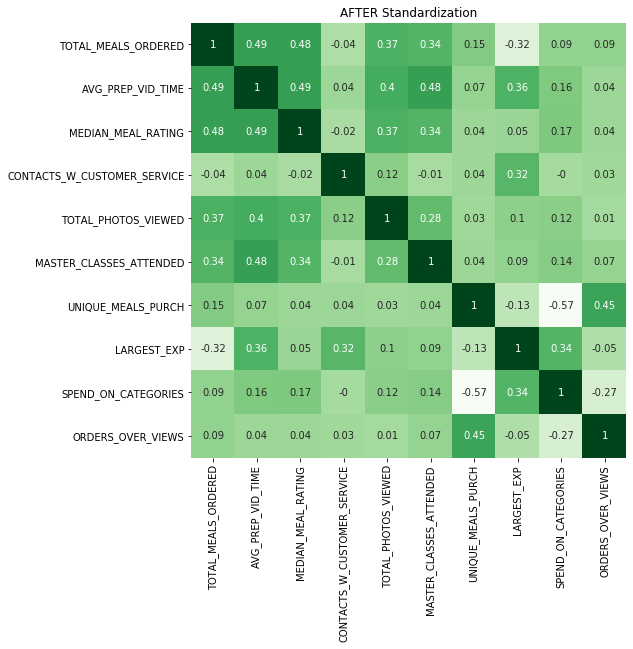

In [32]:
# SCALED correlation matrix
fig, ax = plt.subplots(figsize = (10, 8))

df_scaled_corr = X_scaled_df.loc[ : , ['TOTAL_MEALS_ORDERED','AVG_PREP_VID_TIME',
                                        'MEDIAN_MEAL_RATING','CONTACTS_W_CUSTOMER_SERVICE',
                                        'TOTAL_PHOTOS_VIEWED','MASTER_CLASSES_ATTENDED', 
                                        'UNIQUE_MEALS_PURCH',
                                        'LARGEST_EXP',
                                        'SPEND_ON_CATEGORIES',
                                        'ORDERS_OVER_VIEWS']].corr().round(2)

bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values
# titling the plot
plt.title("BEFORE Standardization")



# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'Greens',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# titling the plot
plt.title("AFTER Standardization")
plt.show()

In [33]:
# we now split the data
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            original_df_target,
            test_size = 0.25,
            random_state = 222)

<h3>Part III: Utilizing Appropriate Modeling Techniques </h3><br>

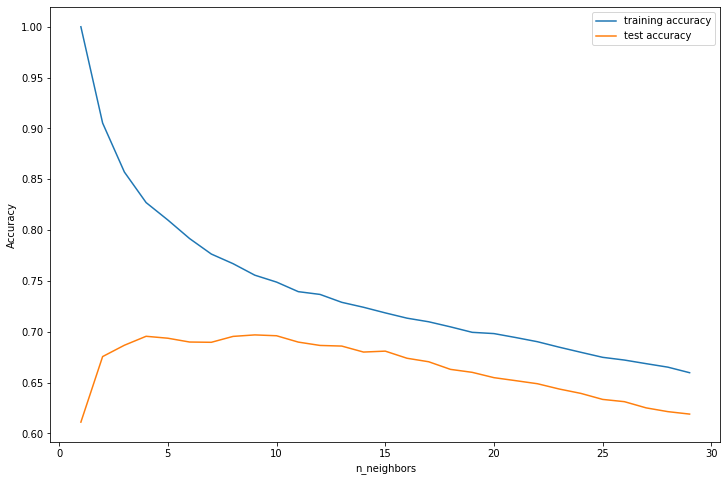

The optimal number of neighbors is 9


In [34]:
# KNN
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 30)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [35]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = 10)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(3))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(3))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(3)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(3)

Training Score: 0.749
Testing Score: 0.696


In [36]:
# We split data again for other variables which dont need standardization
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)

In [37]:
# LR
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:', lr.score(X_test, y_test).round(3))

lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score = lr.score(X_test, y_test).round(3)

Training Score: 0.903
Testing Score: 0.902


In [38]:
#Ridge
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

Training Score: 0.903
Testing Score: 0.902


In [39]:
#Lasso
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(3))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

Training Score: 0.902
Testing Score: 0.902


In [40]:
#Tree
from sklearn import tree

tree_full = DecisionTreeRegressor(max_depth = 5,
                               random_state = 222)

tree_fit = tree_full.fit(X_train, y_train)

tree_pred = tree_fit.predict(X_test)

print('Training Score', tree_full.score(X_train, y_train).round(3))
print('Testing Score:', tree_full.score(X_test, y_test).round(3))

tree_train_score = tree_full.score(X_train, y_train).round(3)
tree_test_score  = tree_full.score(X_test, y_test).round(3)

#fig, ax = plt.subplots(figsize = (16, 16))
#tree.plot_tree(tree_fit, filled = True)
#plt.show()



Training Score 0.84
Testing Score: 0.796


In [41]:
#MLPRegressor neural_network
from sklearn.neural_network import MLPRegressor
MLP_model = MLPRegressor()
# FITTING the training data
MLP_fit = MLP_model.fit(X_train, y_train)


# PREDICTING on new data
MLP_pred = MLP_fit.predict(X_test)

print('Training Score:', MLP_model.score(X_train, y_train).round(3))
print('Testing Score:',  MLP_model.score(X_test, y_test).round(3))


# saving scoring data for future use
MLP_train_score = MLP_model.score(X_train, y_train).round(3)
MLP_test_score  = MLP_model.score(X_test, y_test).round(3)

Training Score: 0.894
Testing Score: 0.885


In [42]:
#OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuit
# FITTING the training data
OMP_model = OrthogonalMatchingPursuit()
OMP_fit = OMP_model.fit(X_train, y_train)


# PREDICTING on new data
OMP_pred = OMP_fit.predict(X_test)

print('Training Score:', OMP_model.score(X_train, y_train).round(3))
print('Testing Score:',  OMP_model.score(X_test, y_test).round(3))


# saving scoring data for future use
OMP_train_score = OMP_model.score(X_train, y_train).round(3)
OMP_test_score  = OMP_model.score(X_test, y_test).round(3)

Training Score: 0.743
Testing Score: 0.761


In [43]:
#LassoLars
from sklearn.linear_model import LassoLars
LL_model = LassoLars(alpha=0.01)
LL_fit = LL_model.fit(X_train, y_train)
LL_pred = LL_fit.predict(X_test)

print('Training Score:', LL_model.score(X_train, y_train).round(3))
print('Testing Score:',  LL_model.score(X_test, y_test).round(3))


# saving scoring data for future use
LL_train_score = LL_model.score(X_train, y_train).round(3)
LL_test_score  = LL_model.score(X_test, y_test).round(3)



Training Score: 0.903
Testing Score: 0.902


<strong> Let's Compare All models </strong>

In [44]:
# comparing results

print(f"""
Model             Train Score      Test Score
-----             -----------      ----------
LassoLars        {LL_train_score}           {LL_test_score}
OMP              {OMP_train_score}           {OMP_test_score}
Lasso            {lasso_train_score}           {lasso_test_score}
MLP              {MLP_train_score}           {MLP_test_score}
RegTree          {tree_train_score}           {tree_test_score}
OLS              {lr_train_score}           {lr_test_score}
Ridge            {ridge_train_score}           {ridge_test_score}
KNN              {knn_stand_score_train}           {knn_stand_score_test}



""")


# creating a dictionary for model results
model_performance = {'Model'    : ['LassoLars','OMP', 'Lasso', 'MLP','RegTree',
                                  'OLS','Ridge','KNN'],
           
                     'Training' : [LL_train_score, OMP_train_score,
                                   lasso_train_score, MLP_train_score,
                                   tree_train_score, lr_train_score,
                                   ridge_train_score, knn_stand_score_train],
           
                     'Testing'  : [LL_test_score, OMP_test_score,
                                   lasso_test_score, MLP_test_score,
                                   tree_test_score, lr_test_score,
                                   ridge_test_score, knn_stand_score_test]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)
model_performance.sort_values(by = ['Testing'], ascending = False)



Model             Train Score      Test Score
-----             -----------      ----------
LassoLars        0.903           0.902
OMP              0.743           0.761
Lasso            0.902           0.902
MLP              0.894           0.885
RegTree          0.84           0.796
OLS              0.903           0.902
Ridge            0.903           0.902
KNN              0.749           0.696






,Model,Training,Testing
0,LassoLars,0.903,0.902
2,Lasso,0.902,0.902
5,OLS,0.903,0.902
6,Ridge,0.903,0.902
3,MLP,0.894,0.885
4,RegTree,0.840,0.796
1,OMP,0.743,0.761
7,KNN,0.749,0.696


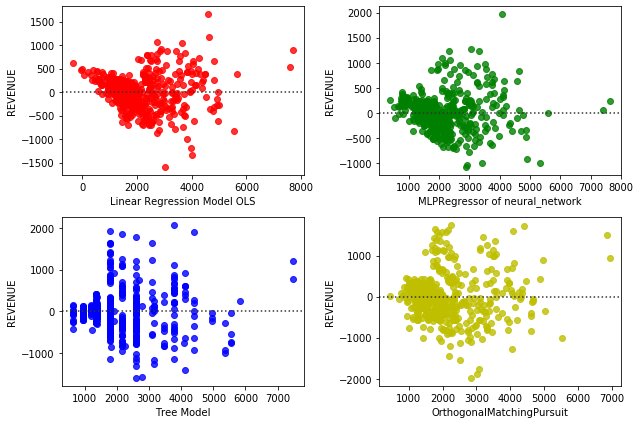

In [45]:
# setting figure size
fig, ax = plt.subplots(figsize = (9,6))

# developing a residual plot
plt.subplot(2,2,1)
sns.residplot(x = lr_pred,
              y = y_test,
             color = "r") 
plt.xlabel('Linear Regression Model OLS')


plt.subplot(2,2,2)
sns.residplot(x = MLP_pred,  
              y = y_test,
             color = "g") 
plt.xlabel('MLPRegressor of neural_network')


plt.subplot(2,2,3)
sns.residplot(x = tree_pred, 
              y = y_test,
             color = "b") 
plt.xlabel('Tree Model')


plt.subplot(2,2,4)
sns.residplot(x = OMP_pred, 
              y = y_test,
             color = "y") 
plt.xlabel('OrthogonalMatchingPursuit')


# saving figure in working directory

# displaying the plot 
plt.tight_layout()
plt.show()

In [46]:
print(" The final model is Ordinary Least Square _ Linear Regression")
time_stop = process_time() 
   
print("Elapsed time:", time_stop, time_start)  
print("Elapsed time during the file proccessing in seconds is :", 
                                         time_stop-time_start)

 The final model is Ordinary Least Square _ Linear Regression
Elapsed time: 31.523726 4.267354
Elapsed time during the file proccessing in seconds is : 27.256372


<strong> THANK YOU VERY MUCH ! </strong>
***

~~~

   ___  _   _ _____                      
  / _ \| | | |_   _|                     
 | | | | | | | | |    _____              
 | |_| | |_| | | |   |_____|             
  \___/ \___/  |_|                       
      _                  _ _             
  ___| |_ __ _ _ __   __| (_)_ __   __ _ 
 / __| __/ _` | '_ \ / _` | | '_ \ / _` |
 \__ \ || (_| | | | | (_| | | | | | (_| |
 |___/\__\__,_|_| |_|\__,_|_|_| |_|\__, |
                                   |___/ 
~~~


***